In [172]:
import numpy as np
import pickle as pl
import pandas as pd
import matplotlib.pyplot as plt
from surprise import Dataset, Reader, accuracy
from surprise.model_selection import train_test_split, KFold
import pyximport
pyximport.install(setup_args={"include_dirs": np.get_include()},
                  reload_support=True)
from algorithms.knn_neighborhood import UserKNN
from collections import defaultdict
from matplotlib.lines import Line2D
from scipy.stats import spearmanr, pearsonr, skew, spearmanr, kendalltau
from sklearn.preprocessing import MinMaxScaler

In [173]:
def profile_size(trainset):
    n_ratings = np.zeros(trainset.n_users)
    for uid, ratings in trainset.ur.items():
        n_ratings[uid] = len(ratings)
    return n_ratings

In [174]:
data_df = pd.read_csv("data/ml-1m/ratings.dat", sep="::", names=["user_id", "item_id", "rating", "timestamp"])
data_df.drop(columns=["timestamp"], inplace=True)
ml_itempop = data_df.groupby("item_id").size()
dataset = Dataset.load_from_df(data_df, reader=Reader(rating_scale=(1, 5)))
trainset, testset = train_test_split(dataset, test_size=0.2)

ml_pop = UserKNN.compute_popularities(trainset)
ml_ratings = profile_size(trainset)

data_df = pd.read_csv("data/douban/douban.csv", sep=";", names=["user_id", "item_id", "rating"])
dataset = Dataset.load_from_df(data_df, reader=Reader(rating_scale=(1, 5)))
douban_itempop = data_df.groupby("item_id").size()
trainset, testset = train_test_split(dataset, test_size=0.2)
douban_pop = UserKNN.compute_popularities(trainset)
douban_ratings = profile_size(trainset)

data_df = pd.read_csv("data/lfm/artist_ratings.csv", sep=";", names=["user_id", "item_id", "rating"])
dataset = Dataset.load_from_df(data_df, reader=Reader(rating_scale=(1, 1000)))
lfm_itempop = data_df.groupby("item_id").size()
trainset, testset = train_test_split(dataset, test_size=0.2)
lfm_pop = UserKNN.compute_popularities(trainset)
lfm_ratings = profile_size(trainset)

data_df = pd.read_csv("data/goodreads/sample.csv", sep=";", names=["user_id", "item_id", "rating"])
goodreads_pop = data_df.groupby("item_id").size().sort_values(ascending=False) / data_df["user_id"].nunique()
goodreads_itempop = data_df.groupby("item_id").size()
dataset = Dataset.load_from_df(data_df, reader=Reader(rating_scale=(1, 5)))
trainset, testset = train_test_split(dataset, test_size=0.2)
goodreads_pop = UserKNN.compute_popularities(trainset)
goodreads_ratings = profile_size(trainset)

data_df = pd.read_csv("data/ciao/ciao.csv", sep=";", names=["user_id", "item_id", "rating"])
ciao_itempop = data_df.groupby("item_id").size()
ciao_pop = data_df.groupby("item_id").size().sort_values(ascending=False) / data_df["user_id"].nunique()
dataset = Dataset.load_from_df(data_df, reader=Reader(rating_scale=(1, 5)))
trainset, testset = train_test_split(dataset, test_size=0.2)
ciao_pop = UserKNN.compute_popularities(trainset)
ciao_ratings = profile_size(trainset)

C:\Users\pmuellner\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [175]:
np.mean(ml_pop), np.mean(douban_pop), np.mean(lfm_pop), np.mean(goodreads_pop), np.mean(ciao_pop)

(14.330456586333929,
 20.984497896055665,
 17.62507266666668,
 1.5422585819771637,
 0.10873077851192185)

In [176]:
skew(ml_ratings), skew(douban_ratings), skew(lfm_ratings), skew(goodreads_ratings), skew(ciao_ratings)

(2.7387871285280494,
 6.410981049052454,
 2.006531253706919,
 6.587954999302318,
 8.010258065777784)

In [177]:
skew(ml_itempop), skew(douban_itempop), skew(lfm_itempop), skew(goodreads_ratings), skew(ciao_itempop)

(2.813796491583702,
 6.600508908788991,
 20.254728551829835,
 6.587954999302318,
 36.95443486619626)

1.6937220158335784
1.7065238515191974
1.341785783288677
1.6921918388139479
3.5791420996221266


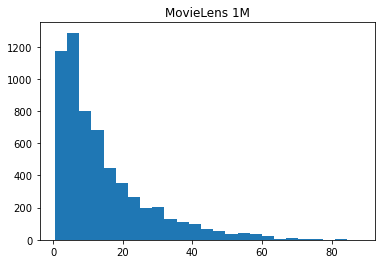

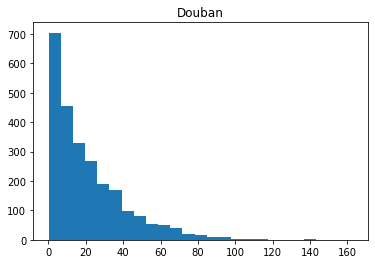

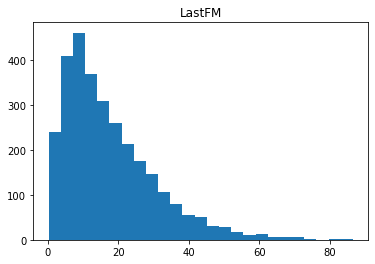

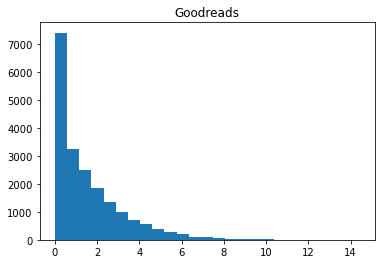

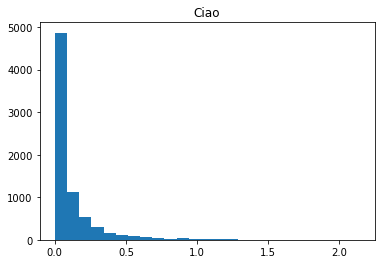

In [142]:
plt.figure()
plt.hist(ml_pop, bins=25)
plt.title("MovieLens 1M");
print(skew(ml_pop))

plt.figure()
plt.hist(douban_pop, bins=25)
plt.title("Douban");
print(skew(douban_pop))

plt.figure()
plt.hist(lfm_pop, bins=25)
plt.title("LastFM");
print(skew(lfm_pop))

plt.figure()
plt.hist(goodreads_pop, bins=25)
plt.title("Goodreads");
print(skew(goodreads_pop))

plt.figure()
plt.hist(ciao_pop, bins=25)
plt.title("Ciao");
print(skew(ciao_pop))

2.813796491583702
6.600508908788991
20.254728551829835
62.45678539960068
36.95443486619626


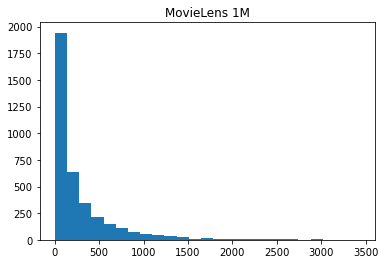

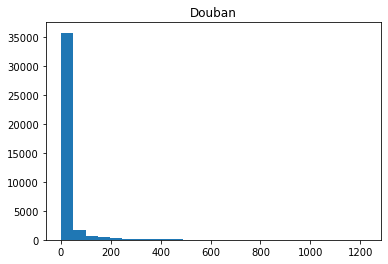

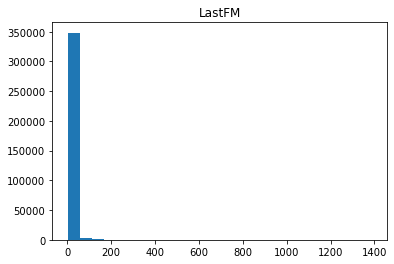

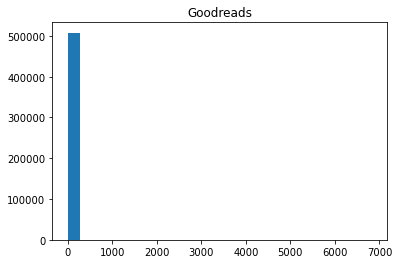

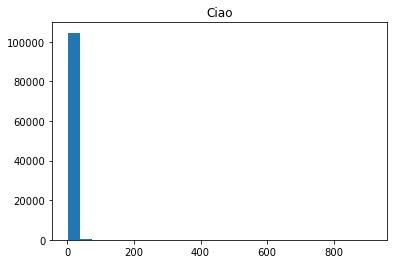

In [191]:
plt.figure()
plt.hist(ml_itempop, bins=25)
plt.title("MovieLens 1M");
print(skew(ml_itempop))

plt.figure()
plt.hist(douban_itempop, bins=25)
plt.title("Douban");
print(skew(douban_itempop))

plt.figure()
plt.hist(lfm_itempop, bins=25)
plt.title("LastFM");
print(skew(lfm_itempop))

plt.figure()
plt.hist(goodreads_itempop, bins=25)
plt.title("Goodreads");
print(skew(goodreads_itempop))

plt.figure()
plt.hist(ciao_itempop, bins=25)
plt.title("Ciao");
print(skew(ciao_itempop))

In [187]:
np.percentile(ml_pop, 99), np.percentile(douban_pop, 99), np.percentile(lfm_pop, 99), np.percentile(goodreads_pop, 99), np.percentile(ciao_pop, 99) 

(58.84099668874168,
 88.3605739338383,
 60.594039999999545,
 7.328655085599196,
 0.8815267796610169)

In [200]:
np.percentile(ml_ratings, 75), np.percentile(douban_ratings, 75), np.percentile(lfm_ratings, 75), np.percentile(goodreads_ratings, 75), np.percentile(ciao_ratings, 75) 

(166.0, 368.0, 606.0, 113.0, 30.0)

In [190]:
max(ml_pop) / np.mean(ml_pop), max(douban_pop) / np.mean(douban_pop), max(lfm_pop) / np.mean(lfm_pop), max(goodreads_pop) / np.mean(goodreads_pop), max(ciao_pop) / np.mean(ciao_pop)

(6.231009555249158,
 7.718731012836085,
 4.863696259370495,
 9.636930306609962,
 20.310778694726977)

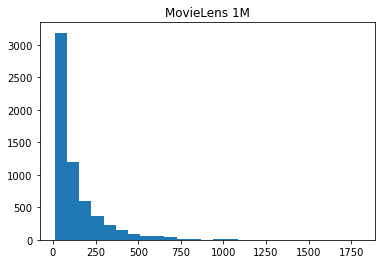

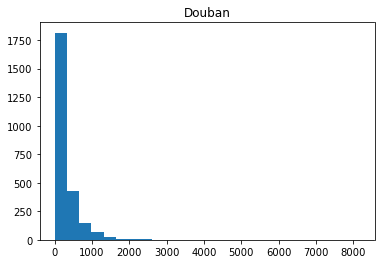

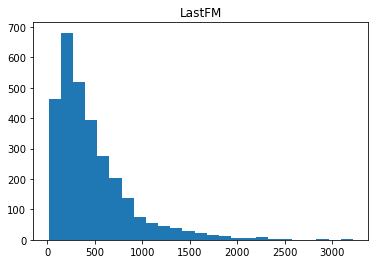

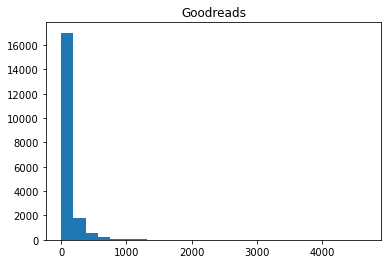

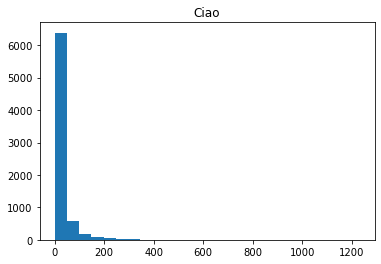

In [144]:
plt.figure()
plt.hist(ml_ratings, bins=25)
plt.title("MovieLens 1M");

plt.figure()
plt.hist(douban_ratings, bins=25)
plt.title("Douban");

plt.figure()
plt.hist(lfm_ratings, bins=25)
plt.title("LastFM");

plt.figure()
plt.hist(goodreads_ratings, bins=25)
plt.title("Goodreads");

plt.figure()
plt.hist(ciao_ratings, bins=25)
plt.title("Ciao");

In [161]:
np.std(ml_pop), np.std(douban_pop), np.std(lfm_pop), np.std(goodreads_pop), np.std(ciao_pop)

(13.124455603303165,
 20.46377189141332,
 13.037421465502312,
 1.6809593871880666,
 0.17549859561023287)

In [145]:
def gini(x):
    x = MinMaxScaler().fit_transform(np.array(x).reshape(-1, 1))
    mad = np.abs(np.subtract.outer(x, x)).mean()
    rmad = mad / np.mean(x)
    g = 0.5 * rmad
    return g

In [8]:
freq, edges = np.histogram(ml_pop, bins=100)
print(gini(freq))

freq, edges = np.histogram(douban_pop, bins=100)
print(gini(freq))

freq, edges = np.histogram(lfm_pop, bins=100)
print(gini(freq))

freq, edges = np.histogram(goodreads_pop, bins=100)
print(gini(freq))

freq, edges = np.histogram(ciao_pop, bins=100)
print(gini(freq))

0.7054966887417219
0.7447548824232763
0.6203133333333332
0.7955386942273759
0.8977071186440677


C:\Users\pmuellner\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\pmuellner\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\pmuellner\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\pmuellner\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\pmuellner\AppData\Local\Con

In [146]:
print(spearmanr(ml_pop, ml_ratings))
print(spearmanr(douban_pop, douban_ratings))
print(spearmanr(lfm_pop, lfm_ratings))
print(spearmanr(goodreads_pop, goodreads_ratings))
print(spearmanr(ciao_pop, ciao_ratings))

SpearmanrResult(correlation=0.9698118527027345, pvalue=0.0)
SpearmanrResult(correlation=0.9690735584218994, pvalue=0.0)
SpearmanrResult(correlation=0.7689067792245882, pvalue=0.0)
SpearmanrResult(correlation=0.7456185068186862, pvalue=0.0)
SpearmanrResult(correlation=0.6718361280131714, pvalue=0.0)


In [147]:
print(pearsonr(ml_pop, ml_ratings))
print(pearsonr(douban_pop, douban_ratings))
print(pearsonr(lfm_pop, lfm_ratings))
print(pearsonr(goodreads_pop, goodreads_ratings))
print(pearsonr(ciao_pop, ciao_ratings))

(0.9641340509619402, 0.0)
(0.8759295050508129, 0.0)
(0.7502141074024167, 0.0)
(0.5698186315132308, 0.0)
(0.6101859160950066, 0.0)


In [134]:
freq, edges = np.histogram(ml_ratings, bins=100)
print(gini(freq))

freq, edges = np.histogram(douban_ratings, bins=100)
print(gini(freq))

freq, edges = np.histogram(lfm_ratings, bins=100)
print(gini(freq))

freq, edges = np.histogram(goodreads_ratings, bins=100)
print(gini(freq))

freq, edges = np.histogram(ciao_ratings, bins=100)
print(gini(freq))

0.86867880794702
0.9319768832204064
0.7345133333333334
0.9543367784219813
0.9530399999999999


C:\Users\pmuellner\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\pmuellner\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\pmuellner\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\pmuellner\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\pmuellner\AppData\Local\Con

In [149]:
top_pop_ml = np.argsort(ml_pop)[::-1][:10]
np.mean(ml_ratings[top_pop_ml]), np.mean(ml_ratings), np.mean(ml_ratings[top_pop_ml]) / np.mean(ml_ratings)

(1221.7, 132.47798013245034, 9.221909926302883)

In [150]:
top_pop_douban = np.argsort(douban_pop)[::-1][:10]
np.mean(douban_ratings[top_pop_douban]), np.mean(douban_ratings), np.mean(douban_ratings[top_pop_douban]) / np.mean(douban_ratings)

(3545.3, 284.9182941410921, 12.443216433987075)

In [151]:
top_pop_lfm = np.argsort(lfm_pop)[::-1][:10]
np.mean(lfm_ratings[top_pop_lfm]), np.mean(lfm_ratings), np.mean(lfm_ratings[top_pop_lfm]) / np.mean(lfm_ratings)

(2318.3, 468.096, 4.952616557287395)

In [152]:
top_pop_goodreads = np.argsort(goodreads_pop)[::-1][:10]
np.mean(goodreads_ratings[top_pop_goodreads]), np.mean(goodreads_ratings), np.mean(goodreads_ratings[top_pop_goodreads]) / np.mean(goodreads_ratings)

(1198.9, 103.48627964352248, 11.585110645873362)

In [153]:
top_pop_ciao = np.argsort(ciao_pop)[::-1][:10]
np.mean(ciao_ratings[top_pop_ciao]), np.mean(ciao_ratings), np.mean(ciao_ratings[top_pop_ciao]) / np.mean(ciao_ratings)

(506.2, 30.656949152542374, 16.511753908755168)

In [155]:
freq, edges = np.histogram(ml_itempop, bins=100)
print(gini(freq))

freq, edges = np.histogram(douban_itempop, bins=100)
print(gini(freq))

freq, edges = np.histogram(lfm_itempop, bins=100)
print(gini(freq))

freq, edges = np.histogram(goodreads_itempop, bins=100)
print(gini(freq))

freq, edges = np.histogram(ciao_itempop, bins=100)
print(gini(freq))

0.8451969778737184
0.9600101071356375
0.9860615637533477
0.9895104345227796
0.9883917561087009


C:\Users\pmuellner\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\pmuellner\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\pmuellner\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\pmuellner\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\pmuellner\AppData\Local\Con

In [157]:
data_df = pd.read_csv("data/ml-1m/ratings.dat", sep="::", names=["user_id", "item_id", "rating", "timestamp"])
data_df.drop(columns=["timestamp"], inplace=True)
sample = np.random.choice(data_df["user_id"].unique(), size=1000, replace=False)
data_df = data_df[data_df["user_id"].isin(sample)]
dataset = Dataset.load_from_df(data_df, reader=Reader(rating_scale=(1, 5)))

#data_df = pd.read_csv("data/douban/douban.csv", sep=";", names=["user_id", "item_id", "rating"])
#sample = np.random.choice(data_df["user_id"].unique(), size=1000, replace=False)
#data_df = data_df[data_df["user_id"].isin(sample)]
#dataset = Dataset.load_from_df(data_df, reader=Reader(rating_scale=(1, 5)))

#data_df = pd.read_csv("data/lfm/artist_ratings.csv", sep=";", names=["user_id", "item_id", "rating"])
#sample = np.random.choice(data_df["user_id"].unique(), size=1000, replace=False)
#data_df = data_df[data_df["user_id"].isin(sample)]
#dataset = Dataset.load_from_df(data_df, reader=Reader(rating_scale=(1, 1000)))

#data_df = pd.read_csv("data/goodreads/sample.csv", sep=";", names=["user_id", "item_id", "rating"])
#sample = np.random.choice(data_df["user_id"].unique(), size=1000, replace=False)
#data_df = data_df[data_df["user_id"].isin(sample)]
#dataset = Dataset.load_from_df(data_df, reader=Reader(rating_scale=(1, 5)))

#data_df = pd.read_csv("data/ciao/ciao.csv", sep=";", names=["user_id", "item_id", "rating"])
#sample = np.random.choice(data_df["user_id"].unique(), size=1000, replace=False)
#data_df = data_df[data_df["user_id"].isin(sample)]
#dataset = Dataset.load_from_df(data_df, reader=Reader(rating_scale=(1, 5)))

trainset, testset = train_test_split(dataset, test_size=0.2)

C:\Users\pmuellner\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [117]:
sim = UserKNN.compute_similarities(trainset, min_support=1)
pop = UserKNN.compute_popularities(trainset)
gain = UserKNN.compute_gain(trainset)

In [122]:
top_neighbors = dict()
for u in trainset.all_users():
    simrank = np.zeros(trainset.n_users)
    for k, v in enumerate(np.argsort(sim[u, :])):
        simrank[v] = k
        
    poprank = np.zeros(trainset.n_users)
    for k, v in enumerate(np.argsort(pop)):
        poprank[v] = k
        
    gainrank = np.zeros(trainset.n_users)
    for k, v in enumerate(np.argsort(gain[u, :])):
        gainrank[v] = k
    
    ranks_u = np.zeros(trainset.n_users)
    for u_ in trainset.all_users():
        if u_ != u:
            ranks_u[u_] = simrank[u_] + gainrank[u_]
    top_10_neighbors = np.argsort(ranks_u)[::-1][:10]
    top_neighbors[u] = list(top_10_neighbors)

In [125]:
"""overlap = []
for u, neighbors in top_neighbors.items():
    overlap_of_neighbors = []
    for n1 in neighbors:
        items_a = set(iid for iid, _ in trainset.ur[n1])
        for n2 in neighbors:
            items_b = set(iid for iid, _ in trainset.ur[n2])
            overlap_of_neighbors.append(len(items_a.intersection(items_b)))
    overlap.append(np.mean(overlap_of_neighbors))
np.mean(overlap)"""

overlap = []
for u, neighbors in top_neighbors.items():
    overlap_with_neighbors = []
    items_u = set(iid for iid, _ in trainset.ur[u])
    for n in neighbors:
        items_n = set(iid for iid, _ in trainset.ur[n])
        overlap_with_neighbors.append(len(items_u.intersection(items_n)))
    overlap.append(np.mean(overlap_with_neighbors))
np.mean(overlap)

4
3
1
1
1
3
1
1
1
1
3
3
2
2
2
1
1
4
4
4
1
1
1
1
1
1
1
1
1
1
3
2
2
2
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
1
2
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
2
1
2
1
1
1
3
1
2
1
1
1
1
1
1
1
2
2
2
1
1
1
1
1
1
1
4
2
2
2
2
2
2
1
1
1
2
1
2
1
2
1
4
3
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
2
2
2
2
2
2
2
2
2
2
3
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
3
5
3
3
2
2
1
1
2
1
1
1
3
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
2
2
2
1
1
1
1
1
1
1
1
2
1
1
2
1
1
1
1
1
1
3
3
4
2
2
2
1
1
1
1
3
2
2
2
2
2
2
2
2
2
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
2
2
1
1
1
1
1
1
1
1
3
2
2
1
1
1
1
1
3
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
2
2
1
2
3
2
2
2
2
2
2
1
1
1
1
1
1
1
1
1
1
0
0
0
1
1
1
1
1
1
0
0
0
0
1
1
1
1
1
1
1
1
1
1
5
4
2
2
2
2
2
2
4
2
1
1
1
2
1
1
1
1
1
1
3
1
1
1
1
2
2
1
1
1
2
3
1
3
1
1
2
2
1
1
1
1
1
1
1
1
0
0
0
0


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
2
1
1
1
1
1
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
0
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
0
0
0
0
0
0
0
0
1
1
1
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
1
1
1
1
1
1
2
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
3
2
2
2
2
2
2
1
5
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
0
0
0
1
1
1
1
1
0
0
0
0
0
1
1
1
1
0
0
0
0
0
0
1
1
2
1
1
1
1
2
1
1
2
2
2
2
2
2
1
2
1
7
1
1
1
1
1
2
1
1
1
0
1
1
1
1
1
1
1
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
0
1
1
1
1
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
4
4
3
2
3
2
2
2
1
4
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
2
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
0
0
0
0
0
0
0
1
1
1
1
0
0
0
0
0
0
2
2
2
1
1
1
1
1


1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
2
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
3
2
2
2
3
3
3
2
2
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
0
1
1
1
1
1
1
1
1
1
1
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
0
0
1
1
1
1
1
1
1
1
1
1
1
1
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
0
0
0
1
2
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
0
0
0
1
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
3
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
1
0
0
0
0
0
0
0
0
0
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
2
1
1
1
0


1.0037

(array([139.,  90., 612.,  87.,  38.,  16.,   9.,   4.,   3.,   2.]),
 array([0.  , 0.41, 0.82, 1.23, 1.64, 2.05, 2.46, 2.87, 3.28, 3.69, 4.1 ]),
 <BarContainer object of 10 artists>)

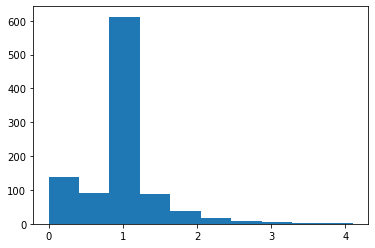

In [124]:
plt.hist(overlap)

In [158]:
m = UserKNN(k=10, tau_4=0.5)
m.fit(trainset)
p = m.test(testset)
accuracy.mae(p);

MAE:  0.7943


In [160]:
for s in [1, 5, 10, 25, 50, 100, 200]:
    sim = UserKNN.compute_similarities(trainset, min_support=s)
    m = UserKNN(k=10, precomputed_sim=sim)
    m.fit(trainset)
    p = m.test(testset)
    accuracy.mae(p)

MAE:  0.8090
MAE:  0.8002
MAE:  0.7998
MAE:  0.8135
MAE:  0.8353
MAE:  0.8778
MAE:  0.9227
